In [1]:
from google.colab import files

uploaded = files.upload()

Saving Demo data.xlsx to Demo data.xlsx


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Giving Data.csv to Giving Data.csv


In [3]:
#Reading in the dataset
import pandas as pd
df1 = pd.read_excel("Demo data.xlsx")
df2 = pd.read_csv("Giving Data.csv")

In [4]:
#Checking the first few values of Demo Data
df1.head()


,Member_ID,Age,Gender,Membership_level,Address (Primary)\City,Address (Primary)\State,Address (Primary)\Country,Education History\Class of,Education History\Educational history major information\Granting college,Education History\Educational history major information\Major,Expiration_date,Downloaded,Installed
0,10282734,91.0,Male,Lifetime,Savannah,Georgia,United States,1954.0,1KM-Gies College of Business,11: Commerce Law,Infinity,NaN,NaN
1,10285055,84.0,Male,Lifetime,Boulder,Colorado,United States,1963.0,1KM-Gies College of Business,1432: Marketing,Infinity,NaN,NaN
2,10286704,93.0,Female,Lifetime,Champaign,Illinois,United States,1950.0,1KV-Liberal Arts & Sciences,NaN,Infinity,NaN,NaN
3,10287463,0.0,Male,Lifetime,Sudbury,Massachusetts,United States,1960.0,NaN,NaN,Infinity,NaN,NaN
4,10287554,89.0,Female,Lifetime,Naples,Florida,United States,1956.0,1KN-Education,0095: Elementary Education,Infinity,NaN,NaN


In [5]:
#Checking the first few values of Giving Data
df2.head()

,Lookup ID,Age,Donor History\Entity Cumulative Lifetime Giving Amount,Donor History\Household Cumulative Lifetime Giving Years,Donor History\Household Consecutive Years of Giving,QUERYRECID
0,12026414,57,"$2,675.65",8.0,7.0,e25e4e32-6c9c-4d0f-87c0-98364727cbb9
1,11363663,68,$275.00,3.0,3.0,4488583f-35db-4351-af05-2cf7d4cf627e
2,11477547,52,"$1,550.00",8.0,5.0,196b844f-7b93-4d0d-a33b-3496fa353388
3,11398780,82,$465.00,7.0,2.0,0693cab0-b169-4b81-8a37-5e47281462f9
4,11317271,57,"$38,470.00",18.0,3.0,5deabd98-ddf4-4876-8794-ac36a1abfda3


In [6]:
#Merging two datasets
merged_data = pd.merge(df1, df2, how='inner', left_on = 'Member_ID' , right_on = 'Lookup ID')
merged_data.head()

,Member_ID,Age_x,Gender,Membership_level,Address (Primary)\City,Address (Primary)\State,Address (Primary)\Country,Education History\Class of,Education History\Educational history major information\Granting college,Education History\Educational history major information\Major,Expiration_date,Downloaded,Installed,Lookup ID,Age_y,Donor History\Entity Cumulative Lifetime Giving Amount,Donor History\Household Cumulative Lifetime Giving Years,Donor History\Household Consecutive Years of Giving,QUERYRECID
0,10282734,91.0,Male,Lifetime,Savannah,Georgia,United States,1954.0,1KM-Gies College of Business,11: Commerce Law,Infinity,NaN,NaN,10282734,91,$300.00,2.0,2.0,a6374c50-e628-4397-a5ce-3854a3c4cf93
1,10285055,84.0,Male,Lifetime,Boulder,Colorado,United States,1963.0,1KM-Gies College of Business,1432: Marketing,Infinity,NaN,NaN,10285055,85,$5.00,1.0,1.0,7d166077-0341-4297-982d-9ffb68e13f1f
2,10286704,93.0,Female,Lifetime,Champaign,Illinois,United States,1950.0,1KV-Liberal Arts & Sciences,NaN,Infinity,NaN,NaN,10286704,94,"$5,860.00",29.0,29.0,acf00e18-070a-4398-8780-75698de57b89
3,10287463,0.0,Male,Lifetime,Sudbury,Massachusetts,United States,1960.0,NaN,NaN,Infinity,NaN,NaN,10287463,0,$510.00,9.0,9.0,1ba9669c-c040-4fce-ad86-883fc01450eb
4,10287554,89.0,Female,Lifetime,Naples,Florida,United States,1956.0,1KN-Education,0095: Elementary Education,Infinity,NaN,NaN,10287554,89,"$7,200.00",15.0,15.0,f68d7096-2602-43f8-bebb-1dd6743ac76c


In [7]:
#EXPLORATORY DATA ANALYSIS
#Data Cleaning starts here

#Dropping duplicate columns and renaming the existing columns to its correct names

merged_data = merged_data.drop(columns = ['Age_x'])
merged_data = merged_data.drop(columns = ['Lookup ID'])

merged_data.rename(columns={'Age_y':'Age'}, inplace=True)



In [8]:
#For better understanding, I am converting installed and downloaded columns as binary variables

import numpy as np

merged_data['Downloaded_Y/N'] = np.where(merged_data['Downloaded'].isnull(),0,1)
merged_data['Installed_Y/N'] = np.where(merged_data['Installed'].isnull(),0,1)

In [9]:
#Checking if the changes have been reflected or not
merged_data.head()

,Member_ID,Gender,Membership_level,Address (Primary)\City,Address (Primary)\State,Address (Primary)\Country,Education History\Class of,Education History\Educational history major information\Granting college,Education History\Educational history major information\Major,Expiration_date,Downloaded,Installed,Age,Donor History\Entity Cumulative Lifetime Giving Amount,Donor History\Household Cumulative Lifetime Giving Years,Donor History\Household Consecutive Years of Giving,QUERYRECID,Downloaded_Y/N,Installed_Y/N
0,10282734,Male,Lifetime,Savannah,Georgia,United States,1954.0,1KM-Gies College of Business,11: Commerce Law,Infinity,NaN,NaN,91,$300.00,2.0,2.0,a6374c50-e628-4397-a5ce-3854a3c4cf93,0,0
1,10285055,Male,Lifetime,Boulder,Colorado,United States,1963.0,1KM-Gies College of Business,1432: Marketing,Infinity,NaN,NaN,85,$5.00,1.0,1.0,7d166077-0341-4297-982d-9ffb68e13f1f,0,0
2,10286704,Female,Lifetime,Champaign,Illinois,United States,1950.0,1KV-Liberal Arts & Sciences,NaN,Infinity,NaN,NaN,94,"$5,860.00",29.0,29.0,acf00e18-070a-4398-8780-75698de57b89,0,0
3,10287463,Male,Lifetime,Sudbury,Massachusetts,United States,1960.0,NaN,NaN,Infinity,NaN,NaN,0,$510.00,9.0,9.0,1ba9669c-c040-4fce-ad86-883fc01450eb,0,0
4,10287554,Female,Lifetime,Naples,Florida,United States,1956.0,1KN-Education,0095: Elementary Education,Infinity,NaN,NaN,89,"$7,200.00",15.0,15.0,f68d7096-2602-43f8-bebb-1dd6743ac76c,0,0


In [10]:
#Replacing duplicate values in membership level with same value

replacements = {'Illinois Annual' : 'Annual',
                'Life': 'Lifetime',
                'New Graduate Free': 'New Graduate Fee'}

merged_data['Membership_level'] = merged_data['Membership_level'].replace(replacements)

print('unique member levels after replacement:', merged_data['Membership_level'].unique())

unique member levels after replacement: ['Lifetime' 'New Graduate Fee' 'Annual' 'Gift Membership Recipient'
 'Gift Membership Benefactor']


In [11]:
#Checking if the changes have been reflected or not
merged_data.head()

,Member_ID,Gender,Membership_level,Address (Primary)\City,Address (Primary)\State,Address (Primary)\Country,Education History\Class of,Education History\Educational history major information\Granting college,Education History\Educational history major information\Major,Expiration_date,Downloaded,Installed,Age,Donor History\Entity Cumulative Lifetime Giving Amount,Donor History\Household Cumulative Lifetime Giving Years,Donor History\Household Consecutive Years of Giving,QUERYRECID,Downloaded_Y/N,Installed_Y/N
0,10282734,Male,Lifetime,Savannah,Georgia,United States,1954.0,1KM-Gies College of Business,11: Commerce Law,Infinity,NaN,NaN,91,$300.00,2.0,2.0,a6374c50-e628-4397-a5ce-3854a3c4cf93,0,0
1,10285055,Male,Lifetime,Boulder,Colorado,United States,1963.0,1KM-Gies College of Business,1432: Marketing,Infinity,NaN,NaN,85,$5.00,1.0,1.0,7d166077-0341-4297-982d-9ffb68e13f1f,0,0
2,10286704,Female,Lifetime,Champaign,Illinois,United States,1950.0,1KV-Liberal Arts & Sciences,NaN,Infinity,NaN,NaN,94,"$5,860.00",29.0,29.0,acf00e18-070a-4398-8780-75698de57b89,0,0
3,10287463,Male,Lifetime,Sudbury,Massachusetts,United States,1960.0,NaN,NaN,Infinity,NaN,NaN,0,$510.00,9.0,9.0,1ba9669c-c040-4fce-ad86-883fc01450eb,0,0
4,10287554,Female,Lifetime,Naples,Florida,United States,1956.0,1KN-Education,0095: Elementary Education,Infinity,NaN,NaN,89,"$7,200.00",15.0,15.0,f68d7096-2602-43f8-bebb-1dd6743ac76c,0,0


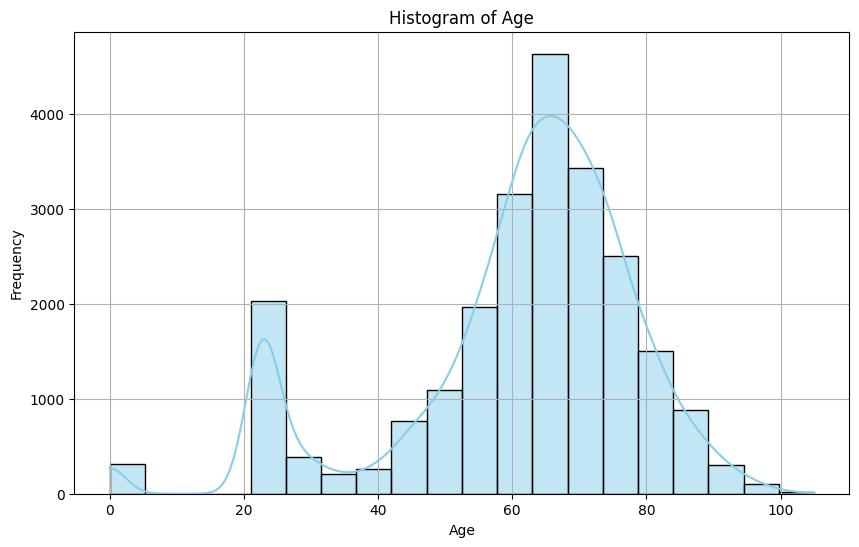

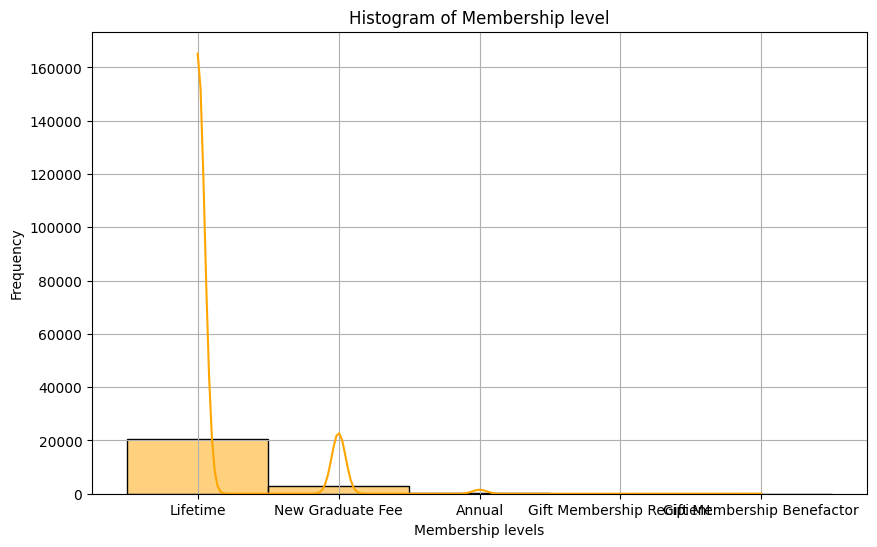

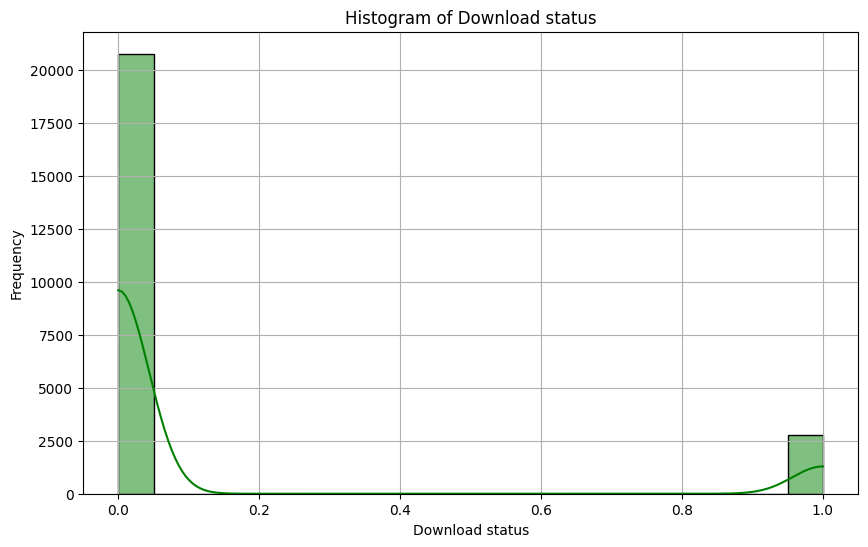

In [12]:

#Checking the distribution of data in the selected variables
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Age'], bins=20, kde = True, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Membership_level'], bins=20, kde = True, color='orange', edgecolor='black')
plt.title('Histogram of Membership level')
plt.xlabel('Membership levels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Downloaded_Y/N'], bins=20, kde = True, color='green', edgecolor='black')
plt.title('Histogram of Download status')
plt.xlabel('Download status')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [13]:
# Creating a new filtered_data which contains data where Age values does not contain 0
filtered_data = merged_data[merged_data['Age'] != 0]
filtered_data.head()


,Member_ID,Gender,Membership_level,Address (Primary)\City,Address (Primary)\State,Address (Primary)\Country,Education History\Class of,Education History\Educational history major information\Granting college,Education History\Educational history major information\Major,Expiration_date,Downloaded,Installed,Age,Donor History\Entity Cumulative Lifetime Giving Amount,Donor History\Household Cumulative Lifetime Giving Years,Donor History\Household Consecutive Years of Giving,QUERYRECID,Downloaded_Y/N,Installed_Y/N
0,10282734,Male,Lifetime,Savannah,Georgia,United States,1954.0,1KM-Gies College of Business,11: Commerce Law,Infinity,NaN,NaN,91,$300.00,2.0,2.0,a6374c50-e628-4397-a5ce-3854a3c4cf93,0,0
1,10285055,Male,Lifetime,Boulder,Colorado,United States,1963.0,1KM-Gies College of Business,1432: Marketing,Infinity,NaN,NaN,85,$5.00,1.0,1.0,7d166077-0341-4297-982d-9ffb68e13f1f,0,0
2,10286704,Female,Lifetime,Champaign,Illinois,United States,1950.0,1KV-Liberal Arts & Sciences,NaN,Infinity,NaN,NaN,94,"$5,860.00",29.0,29.0,acf00e18-070a-4398-8780-75698de57b89,0,0
4,10287554,Female,Lifetime,Naples,Florida,United States,1956.0,1KN-Education,0095: Elementary Education,Infinity,NaN,NaN,89,"$7,200.00",15.0,15.0,f68d7096-2602-43f8-bebb-1dd6743ac76c,0,0
6,10287910,Male,Lifetime,Tallahassee,Florida,United States,1955.0,NaN,NaN,Infinity,NaN,NaN,91,"$1,275.00",14.0,2.0,ffec181f-6229-4ede-93ec-dd5d40a7ac55,0,0


In [14]:
# Created a copy of the "filtered_data" DataFrame to make further changes. Doing this is easier for me to revert any changes I made.
filtered_data_copy = filtered_data.copy()
print(filtered_data_copy.isnull().sum())

Member_ID                                                                       0
Gender                                                                          0
Membership_level                                                                0
Address (Primary)\City                                                          5
Address (Primary)\State                                                       188
Address (Primary)\Country                                                       1
Education History\Class of                                                      4
Education History\Educational history major information\Granting college     6051
Education History\Educational history major information\Major                6159
Expiration_date                                                                 0
Downloaded                                                                  20477
Installed                                                                   20658
Age             

In [15]:
#Data Pre-Processing to wok on Regression Analysis

# Step 1: Removing dollar signs and commas, then converting to float
filtered_data_copy['Donor History\\Entity Cumulative Lifetime Giving Amount'] = (
    filtered_data_copy['Donor History\\Entity Cumulative Lifetime Giving Amount']
    .replace('[\$,]', '', regex=True)  # Remove $ and commas
    .astype(float)  # Convert to float
)

# Step 2: Replacing NaN values with 0
filtered_data_copy['Donor History\\Entity Cumulative Lifetime Giving Amount'].fillna(0, inplace=True)

# Checking for any remaining null values in the column
print(filtered_data_copy['Donor History\\Entity Cumulative Lifetime Giving Amount'].isnull().sum())


0


In [16]:
# Correctly filling missing values
filtered_data_copy['Donor History\\Household Cumulative Lifetime Giving Years'].fillna(0, inplace=True)

# After filling, check for any remaining null values
print(filtered_data_copy['Donor History\\Household Cumulative Lifetime Giving Years'].isnull().sum())


0


In [17]:
#Checking overall which columns has null values
print(filtered_data_copy.isnull().sum())

Member_ID                                                                       0
Gender                                                                          0
Membership_level                                                                0
Address (Primary)\City                                                          5
Address (Primary)\State                                                       188
Address (Primary)\Country                                                       1
Education History\Class of                                                      4
Education History\Educational history major information\Granting college     6051
Education History\Educational history major information\Major                6159
Expiration_date                                                                 0
Downloaded                                                                  20477
Installed                                                                   20658
Age             

In [18]:
# 'Gender' column includes 'Male', 'Female', 'Unknown' # USING BASE CATEGORY AS FEMALE
filtered_data_copy['Gender'] = filtered_data_copy['Gender'].astype('category')
filtered_data_copy['Gender'] = filtered_data_copy['Gender'].cat.reorder_categories(['Female', 'Male', 'Unknown'], ordered=True)

#For Membership level #USING ANNUAL AS THE BASE CATEGORY

filtered_data_copy = pd.get_dummies(filtered_data_copy, columns=['Gender', 'Membership_level'], drop_first=True)


In [19]:
filtered_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23246 entries, 0 to 23551
Data columns (total 23 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Member_ID                                                                 23246 non-null  int64  
 1   Address (Primary)\City                                                    23241 non-null  object 
 2   Address (Primary)\State                                                   23058 non-null  object 
 3   Address (Primary)\Country                                                 23245 non-null  object 
 4   Education History\Class of                                                23242 non-null  float64
 5   Education History\Educational history major information\Granting college  17195 non-null  object 
 6   Education History\Educational history major information\Major      

In [20]:
filtered_data_copy.head()

,Member_ID,Address (Primary)\City,Address (Primary)\State,Address (Primary)\Country,Education History\Class of,Education History\Educational history major information\Granting college,Education History\Educational history major information\Major,Expiration_date,Downloaded,Installed,...,Donor History\Household Consecutive Years of Giving,QUERYRECID,Downloaded_Y/N,Installed_Y/N,Gender_Male,Gender_Unknown,Membership_level_Gift Membership Benefactor,Membership_level_Gift Membership Recipient,Membership_level_Lifetime,Membership_level_New Graduate Fee
0,10282734,Savannah,Georgia,United States,1954.0,1KM-Gies College of Business,11: Commerce Law,Infinity,NaN,NaN,...,2.0,a6374c50-e628-4397-a5ce-3854a3c4cf93,0,0,True,False,False,False,True,False
1,10285055,Boulder,Colorado,United States,1963.0,1KM-Gies College of Business,1432: Marketing,Infinity,NaN,NaN,...,1.0,7d166077-0341-4297-982d-9ffb68e13f1f,0,0,True,False,False,False,True,False
2,10286704,Champaign,Illinois,United States,1950.0,1KV-Liberal Arts & Sciences,NaN,Infinity,NaN,NaN,...,29.0,acf00e18-070a-4398-8780-75698de57b89,0,0,False,False,False,False,True,False
4,10287554,Naples,Florida,United States,1956.0,1KN-Education,0095: Elementary Education,Infinity,NaN,NaN,...,15.0,f68d7096-2602-43f8-bebb-1dd6743ac76c,0,0,False,False,False,False,True,False
6,10287910,Tallahassee,Florida,United States,1955.0,NaN,NaN,Infinity,NaN,NaN,...,2.0,ffec181f-6229-4ede-93ec-dd5d40a7ac55,0,0,True,False,False,False,True,False


In [21]:
# List of boolean columns
bool_columns = [
    'Gender_Male',
    'Gender_Unknown',
    'Membership_level_Gift Membership Benefactor',
    'Membership_level_Gift Membership Recipient',
    'Membership_level_Lifetime',
    'Membership_level_New Graduate Fee'
]

# Converting these columns to int
for column in bool_columns:
    filtered_data_copy[column] = filtered_data_copy[column].astype(int)

# Checking the conversion by showing the data types and sample data
print(filtered_data_copy[bool_columns].dtypes)
print(filtered_data_copy[bool_columns].head())

Gender_Male                                    int64
Gender_Unknown                                 int64
Membership_level_Gift Membership Benefactor    int64
Membership_level_Gift Membership Recipient     int64
Membership_level_Lifetime                      int64
Membership_level_New Graduate Fee              int64
dtype: object
   Gender_Male  Gender_Unknown  Membership_level_Gift Membership Benefactor  \
0            1               0                                            0   
1            1               0                                            0   
2            0               0                                            0   
4            0               0                                            0   
6            1               0                                            0   

   Membership_level_Gift Membership Recipient  Membership_level_Lifetime  \
0                                           0                          1   
1                                        

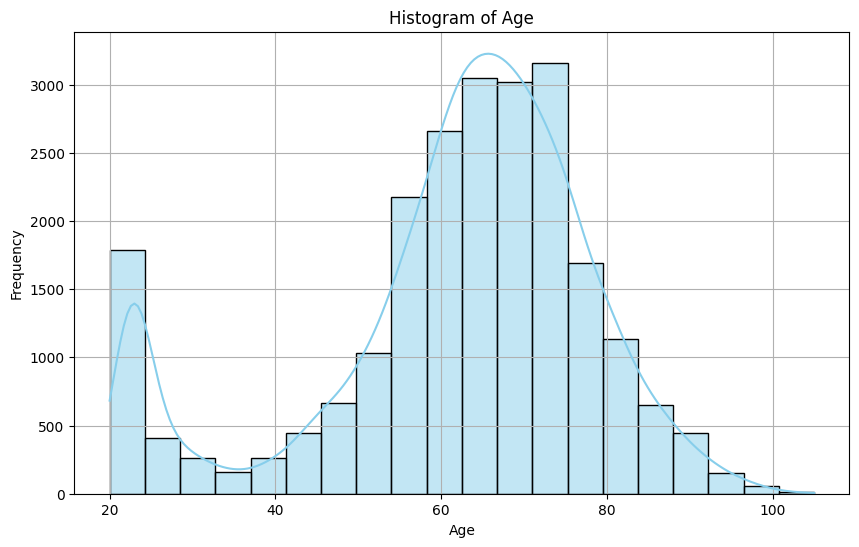

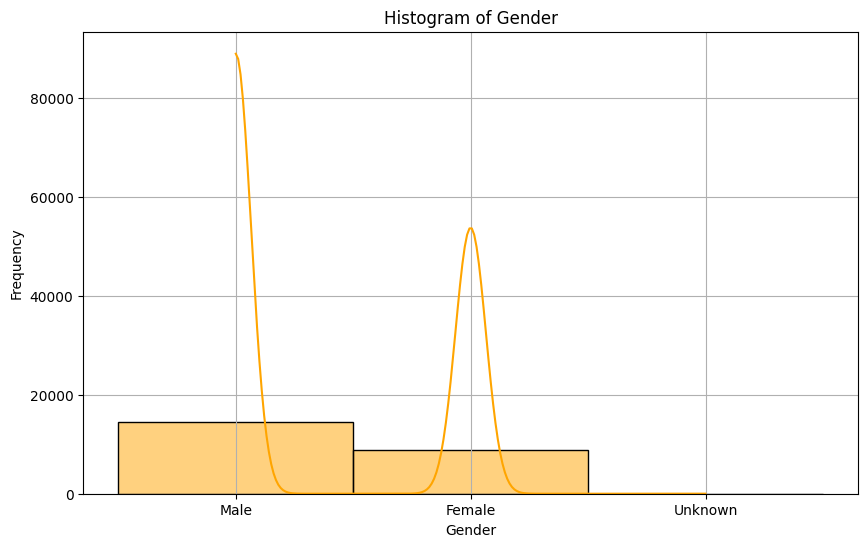

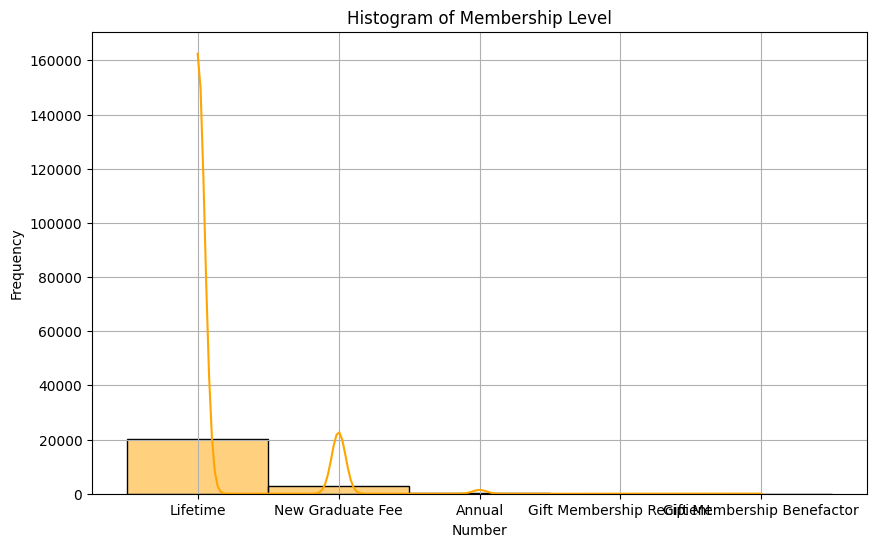

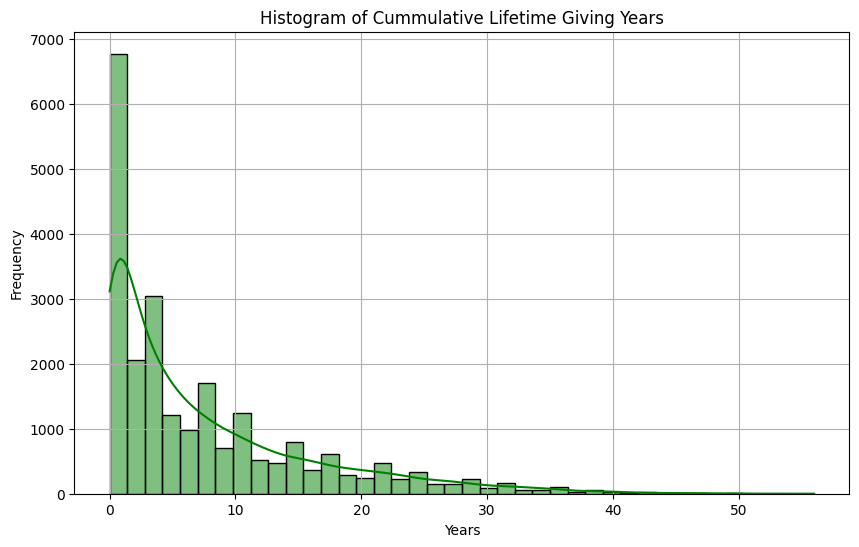

In [22]:
#Checking the distribution of data in the selected variables (Now that these variables don't have null values)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(filtered_data_copy['Age'], bins=20, kde = True, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Gender'], bins=5, kde = True, color='orange', edgecolor='black')
plt.title('Histogram of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Membership_level'], bins=20, kde = True, color='orange', edgecolor='black')
plt.title('Histogram of Membership Level')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(filtered_data_copy['Donor History\Household Cumulative Lifetime Giving Years'], bins=40, kde = True, color='green', edgecolor='black')
plt.title('Histogram of Cummulative Lifetime Giving Years')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [27]:
#LINEAR REGRESSION
# To reduce the skewness of the Cummulative Giving Amount data, I have used Log transformation of the cummulative giving amount.
#There are lot of small values and very few large values

import statsmodels.api as sm
import numpy as np

# Applying a log transformation to the dependent variable
filtered_data_copy['Log_Cumulative_Giving'] = np.log1p(filtered_data_copy['Donor History\\Entity Cumulative Lifetime Giving Amount'])

X = filtered_data_copy[['Gender_Male','Membership_level_Lifetime', 'Membership_level_Gift Membership Benefactor',
                        'Membership_level_Gift Membership Recipient','Donor History\\Household Cumulative Lifetime Giving Years']]
X = sm.add_constant(X)  # Adding a constant

y = filtered_data_copy['Log_Cumulative_Giving']

model = sm.OLS(y, X).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Log_Cumulative_Giving   R-squared:                       0.645
Model:                               OLS   Adj. R-squared:                  0.645
Method:                    Least Squares   F-statistic:                     8452.
Date:                   Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                           16:16:01   Log-Likelihood:                -47305.
No. Observations:                  23246   AIC:                         9.462e+04
Df Residuals:                      23240   BIC:                         9.467e+04
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [29]:
#To check for correlations in the predictor variables
# Checking correlations
corr_matrix = X.corr()
print(corr_matrix)

                                                    const  Gender_Male  \
const                                                 NaN          NaN   
Gender_Male                                           NaN     1.000000   
Membership_level_Lifetime                             NaN     0.082779   
Membership_level_Gift Membership Benefactor           NaN    -0.006752   
Membership_level_Gift Membership Recipient            NaN     0.001022   
Donor History\Household Cumulative Lifetime Giv...    NaN     0.024191   

                                                    Membership_level_Lifetime  \
const                                                                     NaN   
Gender_Male                                                          0.082779   
Membership_level_Lifetime                                            1.000000   
Membership_level_Gift Membership Benefactor                         -0.037973   
Membership_level_Gift Membership Recipient                          -0.02941

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'X' is our DataFrame of predictors including the constant term
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                                             feature       VIF
0                                              const  8.881973
1                                        Gender_Male  1.006931
2                          Membership_level_Lifetime  1.124129
3        Membership_level_Gift Membership Benefactor  1.001716
4         Membership_level_Gift Membership Recipient  1.000885
5  Donor History\Household Cumulative Lifetime Gi...  1.114597


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


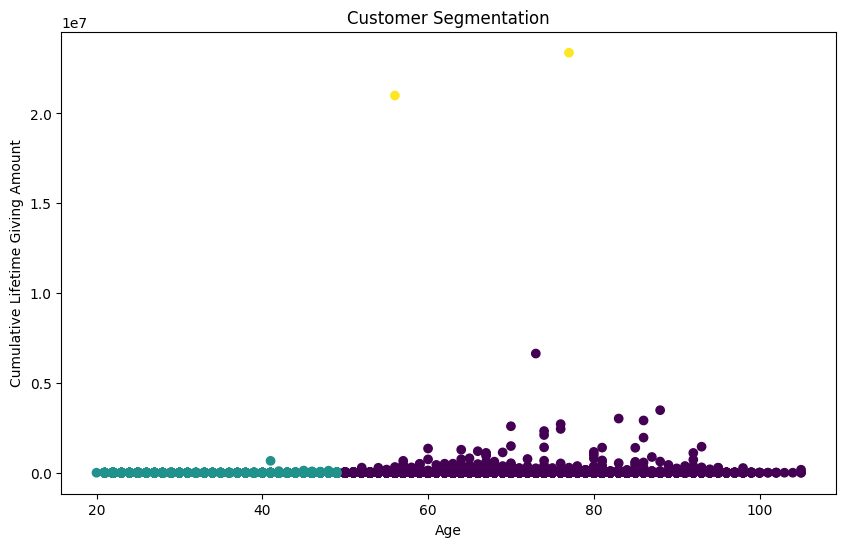

In [30]:
#CLUSTER ANALYSIS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#  columns 'Age', 'Donor History\Entity Cumulative Lifetime Giving Amount', and 'Membership_level' are numeric
features = filtered_data_copy[['Age', 'Donor History\Entity Cumulative Lifetime Giving Amount',]]

# Normalize features to help in convergence and interpretation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Fit K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # choose the number of clusters
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster ID to the original DataFrame
filtered_data_copy['Cluster_ID'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data_copy['Age'], filtered_data_copy['Donor History\Entity Cumulative Lifetime Giving Amount'], c=filtered_data_copy['Cluster_ID'])
plt.xlabel('Age')
plt.ylabel('Cumulative Lifetime Giving Amount')
plt.title('Customer Segmentation')
plt.show()


Text(0, 0.5, 'Total Giving Amount')

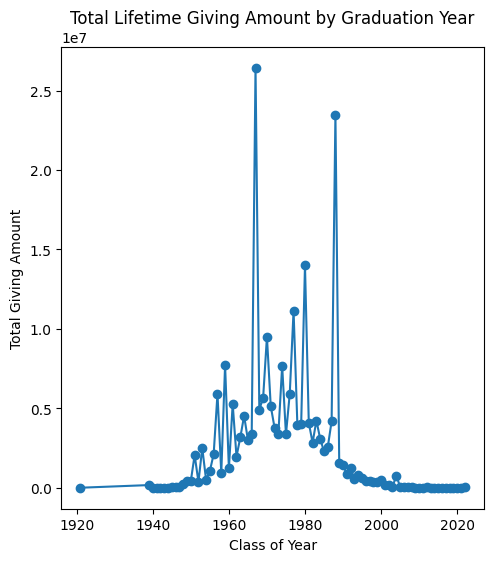

In [31]:
#TIME SERIES ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt

# Converting the 'Class of' column to a numeric type
filtered_data_copy['Education History\\Class of'] = pd.to_numeric(filtered_data_copy['Education History\\Class of'], errors='coerce')

# Group by 'Class of' to get yearly totals/averages
annual_giving = filtered_data_copy.groupby('Education History\\Class of').agg({
    'Donor History\\Entity Cumulative Lifetime Giving Amount': 'sum'
}).dropna()  # Removing years with no data

# Resetting index to make 'Class of' a column again to use it as a variable
annual_giving.reset_index(inplace=True)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(annual_giving['Education History\\Class of'], annual_giving['Donor History\\Entity Cumulative Lifetime Giving Amount'], marker='o')
plt.title('Total Lifetime Giving Amount by Graduation Year')
plt.xlabel('Class of Year')
plt.ylabel('Total Giving Amount')

